In [178]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_col = ["sentence","brand_name","info","index","content","total","thank_you"]
y_col = ["brand_name","info","index","content","total","thank_you"]


In [179]:
train_df = pd.read_csv('../text_classification/04-08-vigrouppe.csv',   encoding='utf-8')
train_df.head()

,sentence,brand_name,info,index,content,total,thank_you
0,DT: 0903915144,0,1,0,0,0,0
1,FC GOOD COFEE,1,0,0,0,0,0
2,"ĐC: 126 Lai Hùng Cường, Vĩnh Lọc B,",0,1,0,0,0,0
3,"Bình Chánh, TpHCM",0,1,0,0,0,0
4,ĐT: 0934145879,0,1,0,0,0,0


In [180]:
def count_pandas(df,row):
    new_pandas = df.query(row+">0")
    return new_pandas.shape[0]

# count_pandas(train_df,"info")

In [181]:
# Delete same data
# delete_data = []
# for index, row in train_df.iterrows():
#     sentence = row['sentence']
#     for i,r in train_df.iterrows():
#         if i!= index:
#             if r['sentence'] == sentence:
#                 delete_data.append(i)
#                 print("=====")
#                 print(row['sentence'])
#                 print(r['sentence'])

In [182]:
# # delete data
# delete_data = list(set(delete_data))

# org_train_df = train_df
# org_delete_data = delete_data
# delete_data = []
# for i in org_delete_data:
#     delete_data.append(int(i))
# # for index in delete_data:
# #     train_df.drop[train_df.loc(int(index))]
# # print(len(delete_data))
# # print(delete_data)
# train_df = train_df.drop(delete_data)

In [183]:
# train_df.to_csv("31-07-vigroupped.csv", index = False,  encoding='utf-8')

In [184]:
# df.query("brand_name>0")

[31, 183, 60, 228, 133, 42]


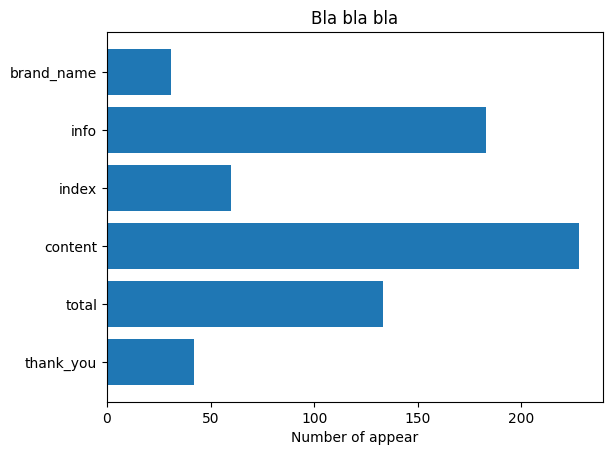

In [185]:
# Explore data
plt.rcdefaults()
fig, ax = plt.subplots()
# Example data

y_pos = np.arange(len(y_col))
performance = []

for col in y_col:
    performance.append(count_pandas(train_df,col))

print(performance)
error = np.random.rand(len(y_col))

ax.barh(y_col, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y_col)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of appear')
ax.set_title('Bla bla bla')

plt.show()

In [186]:
import numpy as np
import os
import pickle
from keras.optimizers import SGD, Adam, Nadam, RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras.models import Sequential,Model,load_model
from keras.layers import Embedding,Conv1D,MaxPooling1D
from keras.layers.core import Dense, Activation,Dropout ,Flatten
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import sequence
from keras.preprocessing.text import text_to_word_sequence,one_hot,Tokenizer
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint,TensorBoard, ReduceLROnPlateau,EarlyStopping
from keras.applications import Xception
from keras import regularizers
from keras import backend as K
import keras
import numpy as np
import pandas as pd
import cv2
import os
import glob
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [187]:
seed = 120
np.random.seed(seed)
train_df = shuffle(train_df)
train_df.head()

,sentence,brand_name,info,index,content,total,thank_you
110,"_ 60,008. 60.000",0,0,0,1,0,0
620,Sl TÊN sl Đ.Giá T.TIỀN,0,0,1,0,0,0
252,Công Ty Công Nghệ TinHoc Mai | |,1,0,0,0,0,0
288,"GIAM MON. -1,750.",0,0,0,0,1,0
129,Bạc sửu 1 cốc 100.000 1 100.000,0,0,0,1,0,0


In [188]:
X_train = train_df["sentence"].fillna("fillna").values
Y_train = train_df[['brand_name', 'info', 'index', 'content', 'total', 'thank_you']].values

In [189]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)

Shape of X_train: (677,)
Shape of Y_train: (677, 6)


In [190]:
Tokenizer = Tokenizer()
print(X_train[0])
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels
texts = X_train
print(texts[1])

_ 60,008. 60.000
(Input->Sentence) Length of X_train: (677,)
(output->Labels) Length of Y_train: (677, 6)
Sl TÊN sl Đ.Giá T.TIỀN 


In [191]:
Tokenizer.fit_on_texts(texts) 
Tokenizer_vocab_size = len(Tokenizer.word_index) + 1
print("Tokenizer vocabulary size:",Tokenizer_vocab_size)
len(max(X_train,key=len))


Tokenizer vocabulary size: 1250


45

In [192]:
def calculate_word(df,text):
    count = 0
    for row in df:
        sentence = row.lower()
        if text in sentence:
            print(sentence)
            count += len(sentence.split(text)) - 1
    return count


In [193]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)
print("(Input->Sentence) Length of X_train:",X_train.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (541,)
(output->Labels) Length of Y_train: (541, 6)


In [194]:
X_train_encoded_words = Tokenizer.texts_to_sequences(X_train)
X_val_encoded_words = Tokenizer.texts_to_sequences(X_val)

In [195]:
print(X_train[2])
print(X_train_encoded_words[2])
print(Tokenizer.word_index)

115/100 Lê văn Sỹ, P.13, Q.Phú Nhuận
[486, 18, 487, 172, 488, 173, 42, 174, 265, 489]
{'000': 1, '1': 2, 'sl': 3, 'tiền': 4, 'hàng': 5, '0': 6, 't': 7, 'giá': 8, '10': 9, 'khách': 10, '2': 11, '30': 12, 'tên': 13, '5': 14, '00': 15, 'giờ': 16, '60': 17, '100': 18, '4': 19, 'đơn': 20, '25': 21, '3': 22, 'lại': 23, '20': 24, 'sữa': 25, '17': 26, 'ngày': 27, '45': 28, 'mặt': 29, '12': 30, 'tien': 31, '35': 32, 'trà': 33, 'thành': 34, 'thanh': 35, '6': 36, '500': 37, '19': 38, '95': 39, 'ơn': 40, '50': 41, '13': 42, 'tiên': 43, 'quý': 44, '15': 45, 'cam': 46, 'số': 47, '40': 48, '22': 49, 'hoa': 50, 'xin': 51, 'gặp': 52, 'hà': 53, 'tổng': 54, 'trả': 55, 'ban': 56, 'đ': 57, 'thu': 58, '—': 59, 'phê': 60, 'on': 61, '80': 62, '8': 63, 'rm': 64, 'tra': 65, 'ca': 66, 'dgia': 67, '18': 68, 'toán': 69, 'hen': 70, 'gap': 71, '90': 72, '36': 73, 'lai': 74, 'đgiá': 75, 'cafe': 76, '28': 77, '02': 78, '2018': 79, '05': 80, '01': 81, 'don': 82, 'công': 83, 'giam': 84, 'cốc': 85, 'hẹn': 86, 'cà': 87, '

In [196]:
# print(calculate_word(X_train,'tổng'))
len(max(X_train,key=len))

45

In [197]:
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labelsprint("(Input->Sentence)

(output->Labels) Length of Y_train: (541, 6)


In [198]:
maxWordCount= 800
maxDictionary_size=Tokenizer_vocab_size
X_train_encoded_padded_words = sequence.pad_sequences(X_train_encoded_words, maxlen=maxWordCount)
X_val_encoded_padded_words = sequence.pad_sequences(X_val_encoded_words, maxlen=maxWordCount)

In [199]:
print("(Input->Sentence) Length of X_train:",X_train_encoded_padded_words.shape) # Input -> Input
print("(output->Labels) Length of Y_train:",Y_train.shape) # output -> Labels

(Input->Sentence) Length of X_train: (541, 800)
(output->Labels) Length of Y_train: (541, 6)


In [200]:
print(Y_train.shape)
print(Y_val.shape)

(541, 6)
(136, 6)


In [213]:
# Model

model = Sequential()

model.add(Embedding(maxDictionary_size, 32, input_length=maxWordCount)) #to change words to ints
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
 #hidden layers
model.add(LSTM(10))
# model.add(Flatten())
model.add(Dropout(0.6))
model.add(Dense(1200, activation='relu',W_constraint=maxnorm(1)))
# model.add(Dropout(0.6))
model.add(Dense(500, activation='relu',W_constraint=maxnorm(1)))

# model.add(Dropout(0.5))
 #output layer
model.add(Dense(6, activation='softmax'))

# Compile model
# adam=Adam(lr=learning_rate, beta_1=0.7, beta_2=0.999, epsilon=1e-08, decay=0.0000001)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 800, 32)           40000     
_________________________________________________________________
lstm_8 (LSTM)                (None, 10)                1720      
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 1200)              13200     
_________________________________________________________________
dense_23 (Dense)             (None, 500)               600500    
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 3006      
Total params: 658,426
Trainable params: 658,426
Non-trainable params: 0
_________________________________________________________________


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1200, activation="relu", kernel_constraint=<keras.con...)`
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="relu", kernel_constraint=<keras.con...)`


In [214]:
learning_rate=0.0001
epochs = 15
batch_size = 32 #32
sgd = SGD(lr=learning_rate, nesterov=True, momentum=0.7, decay=1e-4)
Nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)
model.compile(loss='categorical_crossentropy', optimizer=Nadam, metrics=['accuracy'])

In [215]:
print(X_train_encoded_padded_words.shape)
print(Y_train.shape)

print(X_val_encoded_padded_words.shape)
print(Y_val.shape)

(541, 800)
(541, 6)
(136, 800)
(136, 6)


In [216]:
history  = model.fit(X_train_encoded_padded_words,Y_train, epochs = epochs, batch_size=batch_size, verbose=1,
validation_data=(X_val_encoded_padded_words, Y_val))

Train on 541 samples, validate on 136 samples
Epoch 1/15
541/541 [==============================] - 9s 16ms/step - loss: 1.5786 - acc: 0.3512 - val_loss: 1.3903 - val_acc: 0.4926
Epoch 2/15
541/541 [==============================] - 6s 12ms/step - loss: 1.2619 - acc: 0.4806 - val_loss: 1.0824 - val_acc: 0.5956
Epoch 3/15
541/541 [==============================] - 6s 12ms/step - loss: 0.9880 - acc: 0.5767 - val_loss: 0.9372 - val_acc: 0.5882
Epoch 4/15
541/541 [==============================] - 6s 12ms/step - loss: 0.7464 - acc: 0.6876 - val_loss: 0.9558 - val_acc: 0.5882
Epoch 5/15
541/541 [==============================] - 6s 12ms/step - loss: 0.6136 - acc: 0.7671 - val_loss: 0.9523 - val_acc: 0.6618
Epoch 6/15
541/541 [==============================] - 6s 12ms/step - loss: 0.4537 - acc: 0.8022 - val_loss: 1.0120 - val_acc: 0.6324
Epoch 7/15
541/541 [==============================] - 6s 12ms/step - loss: 0.3800 - acc: 0.8540 - val_loss: 1.1012 - val_acc: 0.6029
Epoch 8/15
541/541 [===

In [217]:
score = model.evaluate(X_val_encoded_padded_words, Y_val, verbose=1)
print('Test accuracy:', score[1],'%')

136/136 [==============================] - 0s 2ms/step
Test accuracy: 0.6470588235294118 %


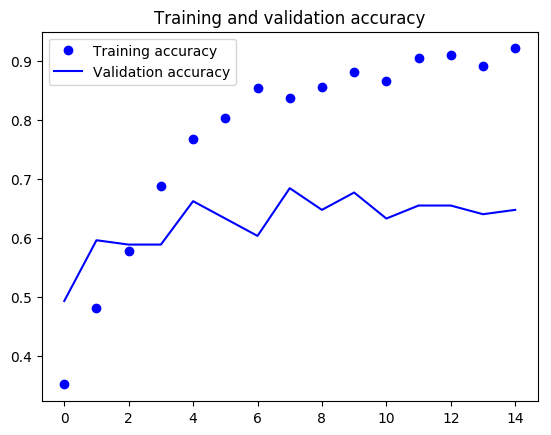

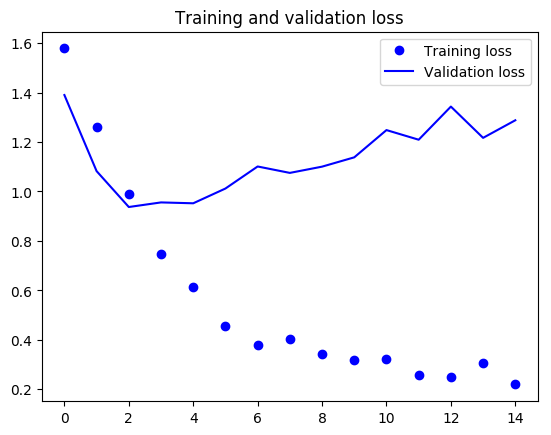

In [218]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [219]:
phrase = "3T: 0902018996"
tokens = Tokenizer.texts_to_sequences([phrase])
tokens = pad_sequences(tokens, maxlen=450)
prediction = model.predict(np.array(tokens))
i_raw,j_raw = np.where(prediction == prediction.max()) #calculates the index of the maximum element of the array across all axis
# i->rows, j->columns
i = int(i_raw)
j = int(j_raw)
print(prediction[0][j])
print(j_raw)
total_possible_outcomes = ['brand_name', 'info', 'index', 'content', 'total', 'thank_you']
print("Result:",total_possible_outcomes[j])

ValueError: Error when checking input: expected embedding_8_input to have shape (800,) but got array with shape (450,)

In [ ]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)

# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")

# with open('tokenizer.pickle', 'wb') as handle:
#     pickle.dump(Tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)